In [1]:
import h5py
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf

import os
import sys
# sys.path.insert(1, os.path.join(sys.path[0], '..'))
print os.getcwd()
os.chdir('..')
print os.getcwd()

/home/rayner/tensorflow/models/inception/cnn_depth_tensorflow/tests
/home/rayner/tensorflow/models/inception/cnn_depth_tensorflow


True
((1, 228, 304, 3), <type 'numpy.ndarray'>, 0.0, 255.0, 131.5502)


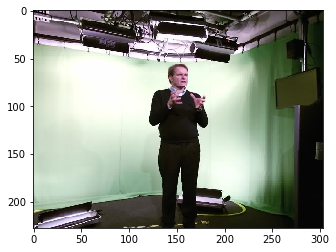

((1, 228, 304, 1), <type 'numpy.ndarray'>, 0.0, 7.4643173, 2.5327115)


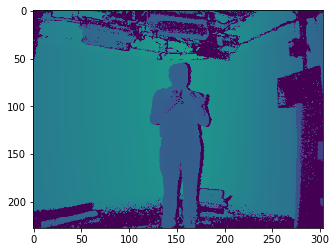

In [2]:
from dataset import DataSet
import dataset
import traceback
with tf.Graph().as_default():
    dataset = DataSet(1)
    print(os.path.exists('train_.csv'))
    images, depths, _ = dataset.csv_inputs('train_.csv', target_size=[228, 304])
    sess = tf.Session()
    coord = tf.train.Coordinator()
    try:
        threads = tf.train.start_queue_runners(sess=sess, coord=coord)
#         im1 = tf.cast(images[0], tf.int32)
#         im2 = tf.subtract(im1, 128)
#         ims, im1, im2  = sess.run([images, im1, im2])
        im, dep = sess.run([images, depths])
        
        print(im.shape, type(im), np.min(im), np.max(im), np.mean(im))
        plt.imshow(im[0].astype(np.uint8))
        plt.show()
        print(dep.shape, type(dep), np.min(dep), np.max(dep), np.mean(dep))
        plt.figure()
#         plt.imshow(dep.astype(np.uint8))
        plt.imshow(dep[0].reshape((228, 304)))
        plt.show()
    except Exception as e:
        coord.request_stop()
        traceback.print_exc()
    coord.request_stop()
    coord.join(threads)
    sess.close()

((360, 434), <type 'numpy.ndarray'>, 0.0, 7.8789999999999996, 2.5292127944188429)


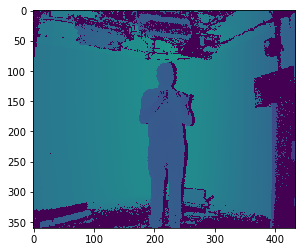

In [4]:
from scipy import misc

dep = misc.imread('/mnt/sdb1/shared/depth/83/aligned/22891.png')
dep = dep /1000.
print(dep.shape, type(dep), np.min(dep), np.max(dep), np.mean(dep))
plt.imshow(dep)
plt.show()
# print(dep.shape)

In [ ]:
b = np.ones([2,3,3])*10
b

In [ ]:
c = b - 5
c

In [ ]:
print(np.mean(b), np.mean(c))

In [ ]:
# filename queue
filename_queue = tf.train.string_input_producer(['train.csv', 'val.csv', 'test.csv'])

In [ ]:
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

In [ ]:
record_defaults = []